In [1]:
import pandas as pd
import os
import platform
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
import shap

In [2]:
print(os.getcwd())

f:\Traumatic_Brain_Injury_103\Data_processing


In [3]:
#Data
print(os.getcwd())

data_link = os.getcwd() + "\\Training\\GBM algorithm\\TBI_data_2.csv"
# data_link = r"F:\CTSN_TBI\Dataset\tbi_500_70fea.csv"
print(data_link)

f:\Traumatic_Brain_Injury_103\Data_processing
f:\Traumatic_Brain_Injury_103\Data_processing\Training\GBM algorithm\TBI_data_2.csv


In [14]:
df_tbi = pd.read_csv(data_link, delimiter = ",")
print(df_tbi)

     record_id  age_at_record  sex  tbi_cli_reason  tbi_cli_time_acci_hos  \
0          109           52.0  0.0             1.0                    2.0   
1          110           75.0  0.0             7.0                    NaN   
2          112           37.0  0.0             1.0                    NaN   
3          113           66.0  0.0             1.0                    NaN   
4          114           20.0  0.0             1.0                    4.0   
..         ...            ...  ...             ...                    ...   
255        391           22.0  0.0             7.0                    2.0   
256        392           40.0  0.0             1.0                    2.0   
257        393           84.0  0.0             1.0                 1440.0   
258        394           44.0  0.0             1.0                    5.0   
259        395           43.0  0.0             1.0                    3.0   

     tbi_cli_pulse  tbi_cli_temp  tbi_cli_blood_pressure  \
0             7

In [15]:
df_tbi.isnull()

,record_id,age_at_record,sex,tbi_cli_reason,tbi_cli_time_acci_hos,tbi_cli_pulse,tbi_cli_temp,tbi_cli_blood_pressure,tbi_cli_breathing_rate,tbi_cli_glasgow,...,ast_v2,alt_v2,d_2_protein,albumin_v2,ure_v2,creatinin_v2,prothrombin_v2,d_3_aptt,d_4_dtim,d_kl_tl
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,False,False,False,False,False,True,True,True,True,False,...,False,False,True,False,False,False,False,False,False,False
256,False,False,False,False,False,True,True,True,True,False,...,False,False,True,False,False,False,False,False,False,False
257,False,False,False,False,False,True,True,True,True,False,...,False,False,True,True,False,False,False,False,False,False
258,False,False,False,False,False,True,True,True,True,False,...,False,False,True,False,False,False,False,False,False,False


In [16]:
df_tbi.describe()

,record_id,age_at_record,sex,tbi_cli_reason,tbi_cli_time_acci_hos,tbi_cli_pulse,tbi_cli_temp,tbi_cli_blood_pressure,tbi_cli_breathing_rate,tbi_cli_glasgow,...,ast_v2,alt_v2,d_2_protein,albumin_v2,ure_v2,creatinin_v2,prothrombin_v2,d_3_aptt,d_4_dtim,d_kl_tl
count,260.000000,259.000000,259.000000,259.000000,240.000000,84.000000,84.000000,83.000000,30.000000,260.000000,...,257.000000,255.000000,214.000000,175.000000,257.000000,257.000000,247.000000,244.000000,193.000000,260.000000
mean,256.565385,43.498069,0.250965,1.536680,35.425000,78.428571,36.692857,2.120482,18.433333,13.053846,...,0.439689,0.235294,0.144860,0.091429,0.175097,0.190661,0.198381,0.311475,1.005181,2.369231
std,81.934758,21.188408,0.434408,1.276504,172.549291,10.695440,0.243857,0.327503,1.755451,2.900703,...,0.497318,0.425017,0.352785,0.289045,0.380792,0.393589,0.399590,0.464049,0.071982,0.726109
min,109.000000,9.000000,0.000000,1.000000,1.000000,52.000000,36.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,191.750000,24.000000,0.000000,1.000000,3.000000,74.000000,36.500000,2.000000,17.250000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,258.500000,43.000000,0.000000,1.000000,4.000000,76.500000,36.700000,2.000000,18.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,326.250000,61.500000,0.500000,2.000000,6.000000,84.000000,36.800000,2.000000,19.000000,15.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,395.000000,90.000000,1.000000,7.000000,1440.000000,120.000000,37.500000,3.000000,25.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000


In [17]:
df_tbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   record_id                                     260 non-null    int64  
 1   age_at_record                                 259 non-null    float64
 2   sex                                           259 non-null    float64
 3   tbi_cli_reason                                259 non-null    float64
 4   tbi_cli_time_acci_hos                         240 non-null    float64
 5   tbi_cli_pulse                                 84 non-null     float64
 6   tbi_cli_temp                                  84 non-null     float64
 7   tbi_cli_blood_pressure                        83 non-null     float64
 8   tbi_cli_breathing_rate                        30 non-null     float64
 9   tbi_cli_glasgow                               260 non-null    int

### Scaler 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

In [19]:
df_new1 = df_tbi.drop('record_id', axis = 1)
df_new = df_new1.drop('d_kl_tl', axis = 1)
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_new)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.530864,0.0,0.0,0.000695,0.264706,0.333333,0.0,0.333333,0.833333,0.0,...,0.767023,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.814815,0.0,1.0,NaN,0.367647,0.533333,0.0,0.666667,0.833333,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,0.345679,0.0,0.0,NaN,0.220588,0.400000,0.0,0.222222,1.000000,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,0.703704,0.0,0.0,NaN,0.338235,0.333333,0.0,0.333333,0.916667,0.5,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.135802,0.0,0.0,0.002085,0.485294,0.533333,0.0,0.222222,1.000000,0.5,...,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.160494,0.0,1.0,0.000695,NaN,NaN,NaN,NaN,1.000000,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0
256,0.382716,0.0,0.0,0.000695,NaN,NaN,NaN,NaN,0.416667,1.0,...,0.530307,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0
257,0.925926,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,0.833333,1.0,...,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0
258,0.432099,0.0,0.0,0.002780,NaN,NaN,NaN,NaN,0.916667,0.0,...,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_tbi_f.columns = df_new.columns.to_list()
df_tbi_f

,age_at_record,sex,tbi_cli_reason,tbi_cli_time_acci_hos,tbi_cli_pulse,tbi_cli_temp,tbi_cli_blood_pressure,tbi_cli_breathing_rate,tbi_cli_glasgow,tbi_cli_awaken,...,ethanol,ast_v2,alt_v2,d_2_protein,albumin_v2,ure_v2,creatinin_v2,prothrombin_v2,d_3_aptt,d_4_dtim
0,0.530864,0.0,0.0,0.000695,0.264706,0.333333,0.0,0.333333,0.833333,0.0,...,0.767023,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.814815,0.0,1.0,NaN,0.367647,0.533333,0.0,0.666667,0.833333,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,0.345679,0.0,0.0,NaN,0.220588,0.400000,0.0,0.222222,1.000000,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,0.703704,0.0,0.0,NaN,0.338235,0.333333,0.0,0.333333,0.916667,0.5,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.135802,0.0,0.0,0.002085,0.485294,0.533333,0.0,0.222222,1.000000,0.5,...,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.160494,0.0,1.0,0.000695,NaN,NaN,NaN,NaN,1.000000,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0
256,0.382716,0.0,0.0,0.000695,NaN,NaN,NaN,NaN,0.416667,1.0,...,0.530307,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0
257,0.925926,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,0.833333,1.0,...,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0
258,0.432099,0.0,0.0,0.002780,NaN,NaN,NaN,NaN,0.916667,0.0,...,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


### KNN Imputer

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi1 = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_at_record                                 260 non-null    float64
 1   sex                                           260 non-null    float64
 2   tbi_cli_reason                                260 non-null    float64
 3   tbi_cli_time_acci_hos                         260 non-null    float64
 4   tbi_cli_pulse                                 260 non-null    float64
 5   tbi_cli_temp                                  260 non-null    float64
 6   tbi_cli_blood_pressure                        260 non-null    float64
 7   tbi_cli_breathing_rate                        260 non-null    float64
 8   tbi_cli_glasgow                               260 non-null    float64
 9   tbi_cli_awaken                                260 non-null    flo

In [22]:
from sklearn.impute import KNNImputer
null_df = pd.DataFrame(df_tbi1.isnull().sum())
null_df[null_df[0]>0]

,0


In [23]:
df_tbi1.head()

,age_at_record,sex,tbi_cli_reason,tbi_cli_time_acci_hos,tbi_cli_pulse,tbi_cli_temp,tbi_cli_blood_pressure,tbi_cli_breathing_rate,tbi_cli_glasgow,tbi_cli_awaken,...,ethanol,ast_v2,alt_v2,d_2_protein,albumin_v2,ure_v2,creatinin_v2,prothrombin_v2,d_3_aptt,d_4_dtim
0,0.530864,0.0,0.0,0.000695,0.264706,0.333333,0.0,0.333333,0.833333,0.0,...,0.767023,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.814815,0.0,1.0,0.568311,0.367647,0.533333,0.0,0.666667,0.833333,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.345679,0.0,0.0,0.015149,0.220588,0.400000,0.0,0.222222,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.703704,0.0,0.0,0.001390,0.338235,0.333333,0.0,0.333333,0.916667,0.5,...,0.153405,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.135802,0.0,0.0,0.002085,0.485294,0.533333,0.0,0.222222,1.000000,0.5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split


X = df_tbi1  
y = df_tbi['d_kl_tl']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### PCA

                                         Feature  Importance
0                    tbi_ct_brain_parenchyma___8    6.472927
1                                tbi_cli_glasgow    6.347569
2                    tbi_cli_pupils_right_reflex    6.183696
3   tbi_ct_subdural_hematoma_position_proprotion    6.073731
4                           tbi_cli_quadriplegia    6.027586
..                                           ...         ...
63             tbi_ct_bottom_tank_characteristic    4.187598
64                        tbi_cli_cardiovascular    4.090062
65                    tbi_ct_midline_shift_width    3.708363
66                  tbi_ct_brain_parenchyma___10    1.367740
67                  tbi_ct_brain_parenchyma___12    1.367740

[68 rows x 2 columns]
Feature rankings based on PCA have been saved to pca_feature_ranking.xlsx


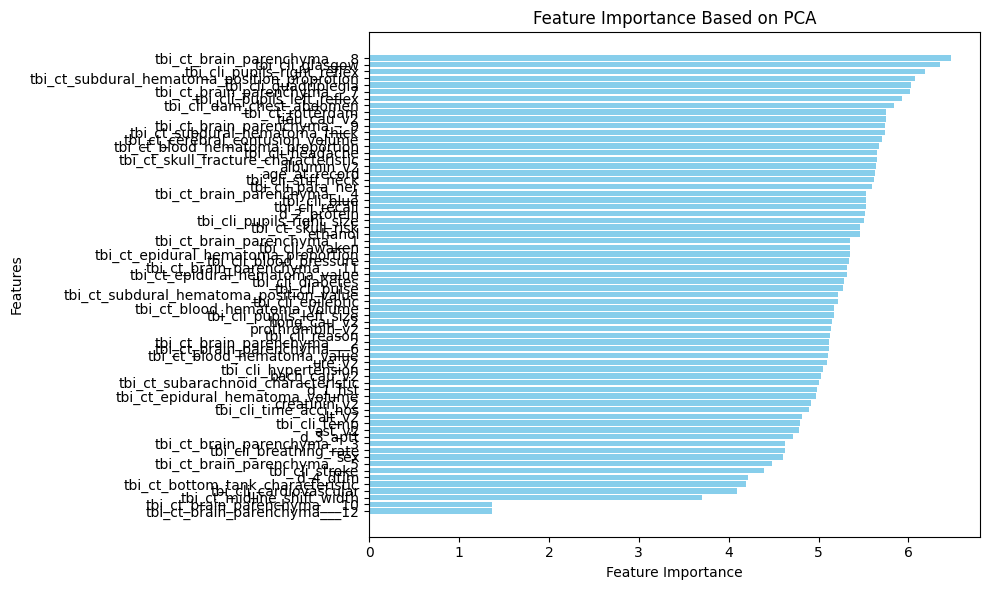

In [25]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=X.shape[1])  
X_pca = pca.fit_transform(X)


explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Explained Variance by Principal Components')
# plt.xticks(range(1, len(explained_variance) + 1))
# plt.grid(True)
# plt.show()

# Get the feature importance by looking at the loadings (PCA components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(explained_variance) + 1)], index=X.columns)
# Rank features by their importance in the first few components (e.g., PC1, PC2)
# We'll take the absolute values since we care about the magnitude of contribution
feature_importance = loadings.apply(np.abs).sum(axis=1).sort_values(ascending=False)

# Create a DataFrame for the ranked features
feature_ranking = pd.DataFrame({
    'Feature': feature_importance.index,
    'Importance': feature_importance.values
})

# Print the feature ranking
print(feature_ranking)
# Save to Excel
excel_file_path = "pca_feature_ranking.xlsx"
feature_ranking.to_excel(excel_file_path, index=False)

print(f"Feature rankings based on PCA have been saved to {excel_file_path}")

# Plot the top features based on PCA importance
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on PCA')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()


In [24]:

# Assuming 'feature_ranking' is already created and sorted
ordered_features = feature_ranking['Feature'].tolist()

# Print the ordered list of features
# print("Ordered list of features by importance (Chi2 Score):")
# for i, feature in enumerate(ordered_features, start=1):
#     print(f"{i}. {feature}")
print(ordered_features )

['tbi_ct_brain_parenchyma___8', 'tbi_cli_glasgow', 'tbi_cli_pupils_right_reflex', 'tbi_ct_subdural_hematoma_position_proprotion', 'tbi_cli_quadriplegia', 'tbi_ct_brain_parenchyma___7', 'tbi_cli_pupils_left_reflex', 'tbi_cli_dam_chest_abdomen', 'tbi_ct_rotterdam', 'tieu_cau_v2', 'tbi_ct_brain_parenchyma___9', 'tbi_ct_subdural_hematoma_thick', 'tbi_ct_cerebral_contusion_volume', 'tbi_ct_blood_hematoma_proportion', 'tbi_cli_headache', 'tbi_ct_skull_fracture_characteristic', 'albumin_v2', 'age_at_record', 'tbi_cli_stiff_neck', 'tbi_cli_para_ner', 'tbi_ct_brain_parenchyma___4', 'tbi_cli_blue', 'tbi_cli_recall', 'd_2_protein', 'tbi_cli_pupils_right_size', 'tbi_ct_skull_risk', 'ethanol', 'tbi_ct_brain_parenchyma___1', 'tbi_cli_awaken', 'tbi_ct_epidural_hematoma_proportion', 'tbi_cli_blood_pressure', 'tbi_ct_brain_parenchyma___11', 'tbi_ct_epidural_hematoma_value', 'tbi_cli_diabetes', 'tbi_cli_pulse', 'tbi_ct_subdural_hematoma_position_value', 'tbi_cli_epileptic', 'tbi_ct_blood_hematoma_volume

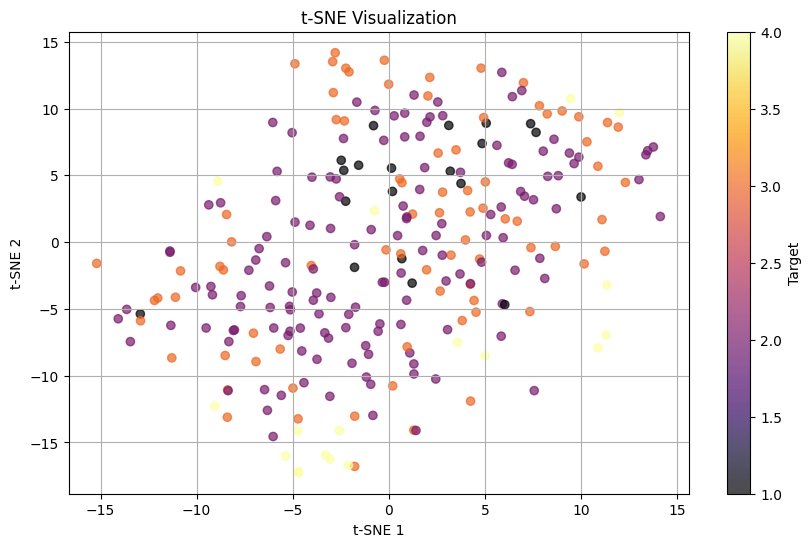

In [41]:
from sklearn.manifold import TSNE
pca = PCA(n_components=50)  # You can choose fewer components based on the data
X_pca = pca.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot t-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='inferno', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
feature_names = X_train.columns


# Initialize Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Get feature importances
feature_importances = gbm.feature_importances_

# Create a DataFrame for the ranked features
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_ranking = feature_ranking.sort_values(by='Importance', ascending=False)

# Print the feature ranking
print(feature_ranking)

# Save the feature ranking to Excel
excel_file_path = "gbm_feature_ranking.xlsx"
feature_ranking.to_excel(excel_file_path, index=False)

print(f"Feature rankings based on GBM have been saved to {excel_file_path}")


                           Feature  Importance
58                         ethanol    0.148329
8                  tbi_cli_glasgow    0.146431
53                tbi_ct_rotterdam    0.074376
40  tbi_ct_epidural_hematoma_value    0.066454
4                    tbi_cli_pulse    0.059297
..                             ...         ...
32     tbi_ct_brain_parenchyma___7    0.000000
29     tbi_ct_brain_parenchyma___4    0.000000
37    tbi_ct_brain_parenchyma___12    0.000000
25          tbi_cli_cardiovascular    0.000000
35    tbi_ct_brain_parenchyma___10    0.000000

[68 rows x 2 columns]
Feature rankings based on GBM have been saved to gbm_feature_ranking.xlsx


## Chi square test

In [27]:
from sklearn.feature_selection import SelectKBest, chi2
# Perform Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')  # Set k='all' to rank all features
X_kbest = chi2_selector.fit(X_train,y_train)

# Get the Chi-Square scores and p-values
chi2_scores = X_kbest.scores_
p_values = X_kbest.pvalues_

# Create a DataFrame to display the feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

# Sort the features by importance (Chi2 score)
feature_ranking = feature_ranking.sort_values(by='Chi2 Score', ascending=False)

print(feature_ranking)

                         Feature  Chi2 Score       p-value
19    tbi_cli_pupils_left_reflex   96.853523  7.378008e-21
32   tbi_ct_brain_parenchyma___7   55.428571  5.562614e-12
21   tbi_cli_pupils_right_reflex   47.918367  2.216384e-10
15            tbi_cli_stiff_neck   34.205394  1.792924e-07
62                    albumin_v2   24.876612  1.638542e-05
..                           ...         ...           ...
24                tbi_cli_stroke    0.016011  9.994638e-01
47   tbi_ct_blood_hematoma_value    0.015280  9.995000e-01
49    tbi_ct_midline_shift_width    0.003514  9.999447e-01
35  tbi_ct_brain_parenchyma___10         NaN           NaN
37  tbi_ct_brain_parenchyma___12         NaN           NaN

[68 rows x 3 columns]


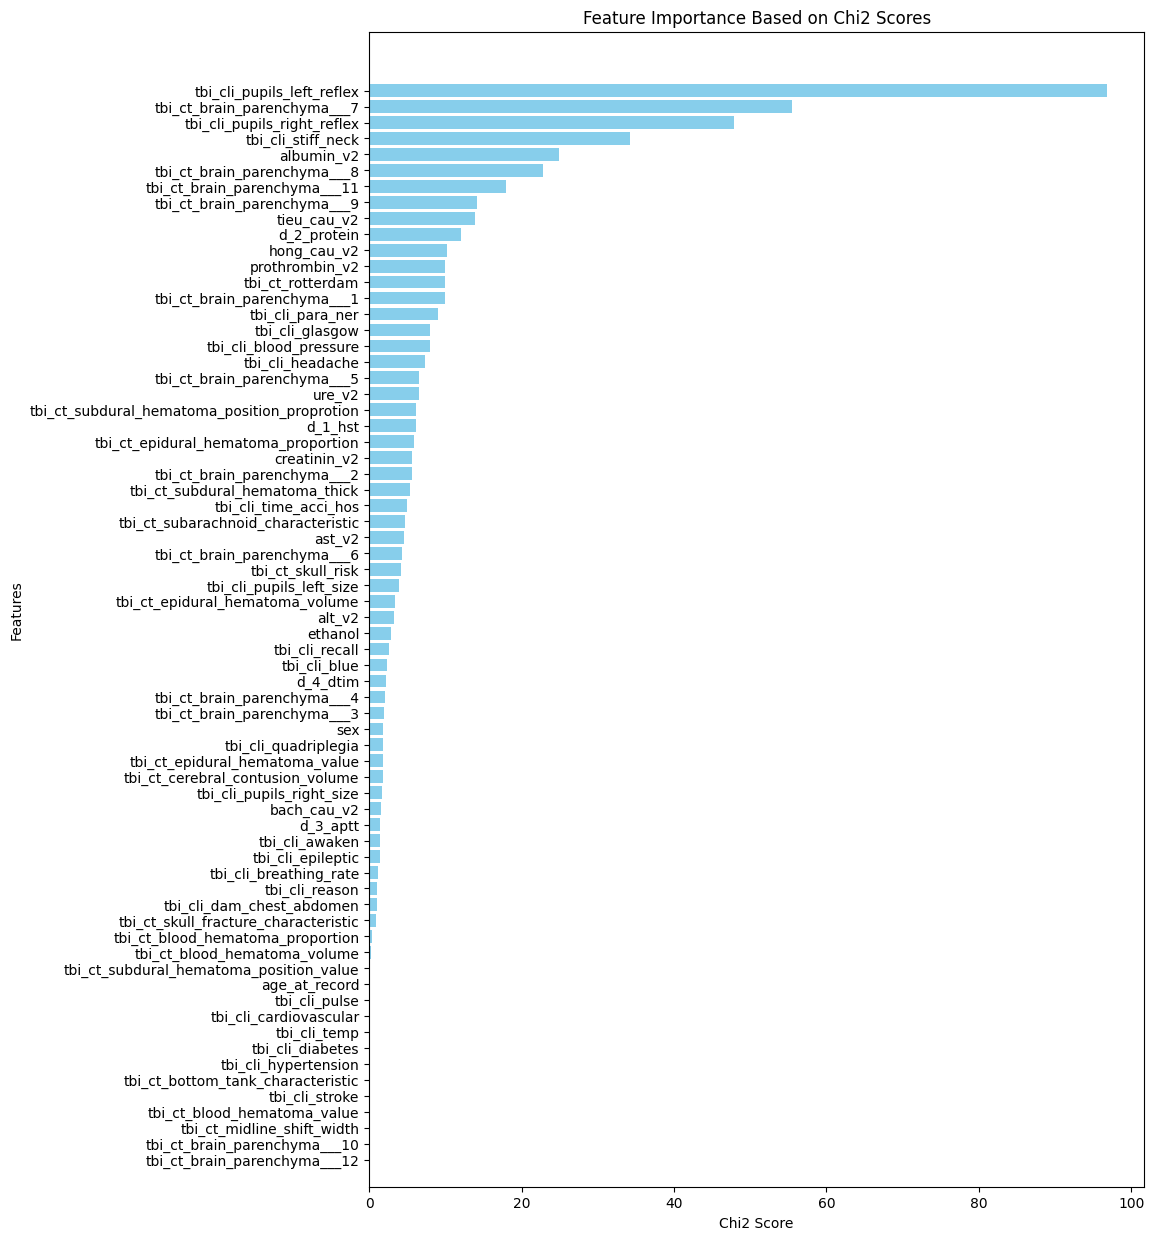

Feature Ranking:
                         Feature  Chi2 Score       p-value
19    tbi_cli_pupils_left_reflex   96.853523  7.378008e-21
32   tbi_ct_brain_parenchyma___7   55.428571  5.562614e-12
21   tbi_cli_pupils_right_reflex   47.918367  2.216384e-10
15            tbi_cli_stiff_neck   34.205394  1.792924e-07
62                    albumin_v2   24.876612  1.638542e-05
..                           ...         ...           ...
24                tbi_cli_stroke    0.016011  9.994638e-01
47   tbi_ct_blood_hematoma_value    0.015280  9.995000e-01
49    tbi_ct_midline_shift_width    0.003514  9.999447e-01
35  tbi_ct_brain_parenchyma___10         NaN           NaN
37  tbi_ct_brain_parenchyma___12         NaN           NaN

[68 rows x 3 columns]


In [28]:
# Sort the DataFrame by Chi2 Score for better visualization
feature_ranking = feature_ranking.sort_values(by='Chi2 Score', ascending=False)

# Plot the feature importance (Chi2 Score)
plt.figure(figsize=(10, 15))
plt.barh(feature_ranking['Feature'], feature_ranking['Chi2 Score'], color='skyblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Feature Importance Based on Chi2 Scores')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Display the feature ranking table
print("Feature Ranking:")
print(feature_ranking)

In [19]:

# Assuming 'feature_ranking' is already created and sorted
ordered_features = feature_ranking['Feature'].tolist()

# Print the ordered list of features
# print("Ordered list of features by importance (Chi2 Score):")
# for i, feature in enumerate(ordered_features, start=1):
#     print(f"{i}. {feature}")
print(ordered_features )

['tbi_cli_pupils_left_reflex', 'tbi_cli_pupils_right_reflex', 'tbi_ct_brain_parenchyma___7', 'tbi_ct_brain_parenchyma___8', 'tbi_cli_stiff_neck', 'albumin_v2', 'tbi_ct_brain_parenchyma___9', 'tbi_ct_brain_parenchyma___11', 'tieu_cau_v2', 'prothrombin_v2', 'tbi_ct_rotterdam', 'd_2_protein', 'tbi_ct_brain_parenchyma___1', 'tbi_cli_para_ner', 'tbi_cli_blood_pressure', 'tbi_cli_headache', 'hong_cau_v2', 'tbi_cli_glasgow', 'tbi_ct_brain_parenchyma___5', 'ure_v2', 'tbi_ct_subdural_hematoma_position_proprotion', 'creatinin_v2', 'tbi_ct_brain_parenchyma___2', 'tbi_ct_brain_parenchyma___6', 'tbi_ct_brain_parenchyma___4', 'tbi_ct_epidural_hematoma_proportion', 'd_1_hst', 'tbi_ct_skull_risk', 'tbi_ct_subdural_hematoma_thick', 'tbi_cli_pupils_left_size', 'tbi_ct_subarachnoid_characteristic', 'ast_v2', 'tbi_cli_time_acci_hos', 'tbi_ct_brain_parenchyma___3', 'tbi_cli_pupils_right_size', 'tbi_ct_cerebral_contusion_volume', 'tbi_ct_epidural_hematoma_volume', 'ethanol', 'tbi_cli_blue', 'bach_cau_v2', '

In [20]:
# Save the feature_ranking DataFrame to an Excel file
excel_file_path = "feature_ranking.xlsx"
feature_ranking.to_excel(excel_file_path, index=False)

print(f"Feature rankings have been saved to {excel_file_path}")


Feature rankings have been saved to feature_ranking.xlsx


                                         Feature  Lasso Coefficient
8                                tbi_cli_glasgow           1.018591
53                              tbi_ct_rotterdam           0.864647
58                                       ethanol           0.421281
39           tbi_ct_epidural_hematoma_proportion           0.380359
42  tbi_ct_subdural_hematoma_position_proprotion           0.249630
..                                           ...                ...
30                   tbi_ct_brain_parenchyma___5           0.000000
32                   tbi_ct_brain_parenchyma___7           0.000000
33                   tbi_ct_brain_parenchyma___8           0.000000
35                  tbi_ct_brain_parenchyma___10           0.000000
67                                      d_4_dtim           0.000000

[68 rows x 2 columns]
Feature rankings based on Lasso have been saved to lasso_feature_ranking.xlsx


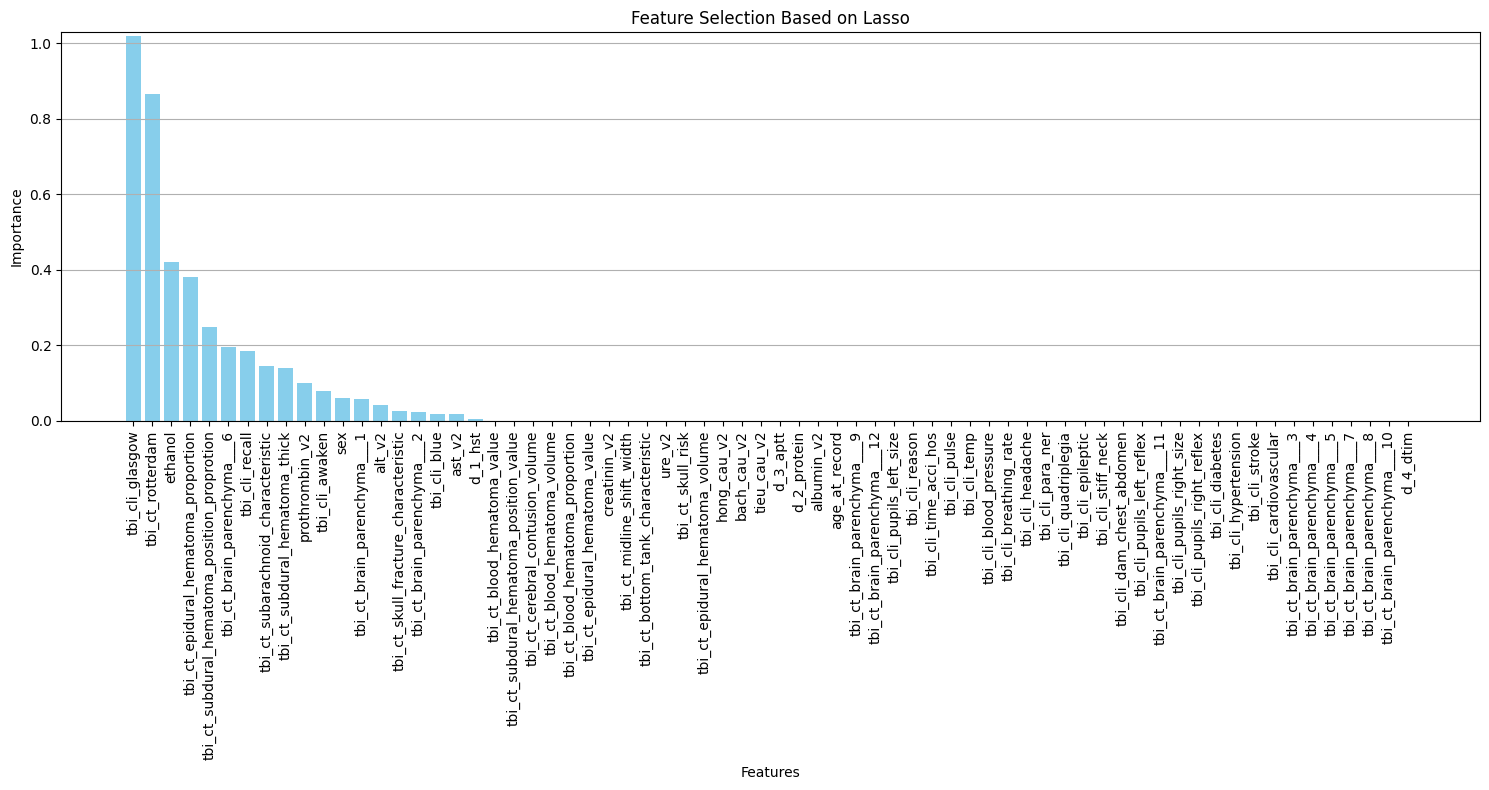

In [29]:
from sklearn.linear_model import Lasso


# Fit the Lasso model (alpha is the regularization strength, adjust as needed)
lasso = Lasso(alpha=0.01)  # You can adjust alpha based on your dataset
lasso.fit(X_train, y_train)

# Get the coefficients from the Lasso model
lasso_coefficients = np.abs(lasso.coef_)  # Using np.abs() to make coefficients positive

# Create a DataFrame to display feature rankings based on Lasso coefficients
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Lasso Coefficient': lasso_coefficients
})

# Sort by the absolute value of the Lasso coefficients
feature_ranking = feature_ranking.sort_values(by='Lasso Coefficient', ascending=False)

# Print the feature ranking
print(feature_ranking)

# Save the feature ranking to an Excel file
excel_file_path = "lasso_feature_ranking.xlsx"
feature_ranking.to_excel(excel_file_path, index=False)

print(f"Feature rankings based on Lasso have been saved to {excel_file_path}")

# Plotting the Column Names and Importance of Columns
plt.figure(figsize=(15, 8))  # Adjust the figure size if needed
plt.bar(feature_ranking['Feature'], feature_ranking['Lasso Coefficient'], color='skyblue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, max(lasso_coefficients) + 0.01)  # Adjusting the y-limit based on maximum importance
plt.tight_layout()  # To ensure labels fit well
plt.show()


In [30]:

# Assuming 'feature_ranking' is already created and sorted
ordered_features = feature_ranking['Feature'].tolist()
print(ordered_features )

['tbi_cli_glasgow', 'tbi_ct_rotterdam', 'ethanol', 'tbi_ct_epidural_hematoma_proportion', 'tbi_ct_subdural_hematoma_position_proprotion', 'tbi_ct_brain_parenchyma___6', 'tbi_cli_recall', 'tbi_ct_subarachnoid_characteristic', 'tbi_ct_subdural_hematoma_thick', 'prothrombin_v2', 'tbi_cli_awaken', 'sex', 'tbi_ct_brain_parenchyma___1', 'alt_v2', 'tbi_ct_skull_fracture_characteristic', 'tbi_ct_brain_parenchyma___2', 'tbi_cli_blue', 'ast_v2', 'd_1_hst', 'tbi_ct_blood_hematoma_value', 'tbi_ct_subdural_hematoma_position_value', 'tbi_ct_cerebral_contusion_volume', 'tbi_ct_blood_hematoma_volume', 'tbi_ct_blood_hematoma_proportion', 'tbi_ct_epidural_hematoma_value', 'creatinin_v2', 'tbi_ct_midline_shift_width', 'tbi_ct_bottom_tank_characteristic', 'ure_v2', 'tbi_ct_skull_risk', 'tbi_ct_epidural_hematoma_volume', 'hong_cau_v2', 'bach_cau_v2', 'tieu_cau_v2', 'd_3_aptt', 'd_2_protein', 'albumin_v2', 'age_at_record', 'tbi_ct_brain_parenchyma___9', 'tbi_ct_brain_parenchyma___12', 'tbi_cli_pupils_left_s

## GBM

Feature ranking:
1.tbi_cli_glasgow (0.209826)
2.ethanol (0.100983)
3.albumin_v2 (0.059843)
4.tbi_ct_cerebral_contusion_volume (0.044083)
5.tbi_ct_rotterdam (0.041449)
6.tbi_ct_skull_risk (0.033266)
7.tbi_cli_time_acci_hos (0.032281)
8.tbi_cli_pulse (0.031892)
9.tbi_cli_dam_chest_abdomen (0.031233)
10.tbi_cli_breathing_rate (0.027923)
11.tbi_ct_subarachnoid_characteristic (0.027637)
12.d_3_aptt (0.026180)
13.tbi_ct_subdural_hematoma_thick (0.024466)
14.tbi_ct_subdural_hematoma_position_proprotion (0.024402)
15.tbi_ct_epidural_hematoma_value (0.023516)
16.ast_v2 (0.021529)
17.tieu_cau_v2 (0.021191)
18.tbi_ct_epidural_hematoma_volume (0.020695)
19.creatinin_v2 (0.019050)
20.bach_cau_v2 (0.016939)
21.tbi_cli_temp (0.016072)
22.d_2_protein (0.013996)
23.hong_cau_v2 (0.013226)
24.ure_v2 (0.011538)
25.alt_v2 (0.010205)
26.tbi_ct_blood_hematoma_value (0.008649)
27.sex (0.008238)
28.age_at_record (0.008136)
29.tbi_ct_blood_hematoma_volume (0.007596)
30.prothrombin_v2 (0.007549)
31.tbi_ct_blood_

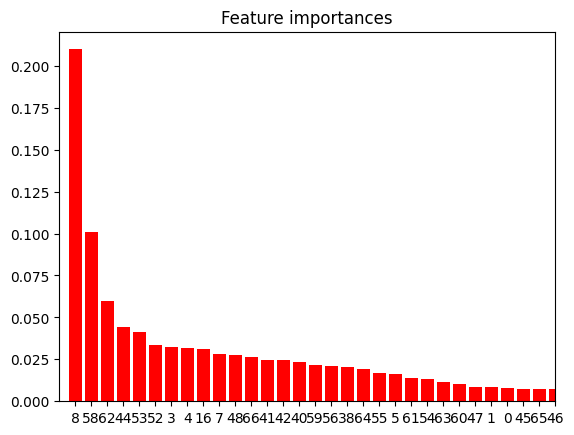

Selected features: Index(['tbi_cli_glasgow', 'ethanol', 'albumin_v2',
       'tbi_ct_cerebral_contusion_volume', 'tbi_ct_rotterdam',
       'tbi_ct_skull_risk', 'tbi_cli_time_acci_hos', 'tbi_cli_pulse',
       'tbi_cli_dam_chest_abdomen', 'tbi_cli_breathing_rate',
       'tbi_ct_subarachnoid_characteristic', 'd_3_aptt',
       'tbi_ct_subdural_hematoma_thick',
       'tbi_ct_subdural_hematoma_position_proprotion',
       'tbi_ct_epidural_hematoma_value', 'ast_v2', 'tieu_cau_v2',
       'tbi_ct_epidural_hematoma_volume', 'creatinin_v2', 'bach_cau_v2',
       'tbi_cli_temp', 'd_2_protein', 'hong_cau_v2', 'ure_v2', 'alt_v2',
       'tbi_ct_blood_hematoma_value', 'sex', 'age_at_record',
       'tbi_ct_blood_hematoma_volume', 'prothrombin_v2',
       'tbi_ct_blood_hematoma_proportion',
       'tbi_ct_subdural_hematoma_position_value', 'd_1_hst',
       'tbi_cli_pupils_left_size', 'tbi_ct_midline_shift_width',
       'tbi_cli_para_ner', 'tbi_ct_bottom_tank_characteristic',
       'tbi_cli_re

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

def gbm_feature_selection(X_train, y_train, feature_names):
    # Initialize Gradient Boosting Classifier
    gbm = GradientBoostingClassifier()
    
    # Fit the model
    gbm.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = gbm.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d.%s (%f)" % (f + 1, feature_names[indices[f]], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    
    # Zoom in on the first 10 features
    plt.xlim(-1, 30)  # Adjust the limit as needed
    
    plt.show()
    
    # Return names of selected features based on importance
    return feature_names[indices]

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Load dataset as an example
X = df_new.values  # Replace df_new with your actual feature DataFrame
y = df_tbi1['d_kl_tl'].values  # Replace df_tbi1['d_kl_tl'] with your actual target variable
feature_names = df_new.columns  # Get column names

# Apply GBM feature selection
selected_features = gbm_feature_selection(X_train, y_train, feature_names)

# Print the selected features
print("Selected features:", selected_features)


### LighGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 58
[LightGBM] [Info] Start training from score -2.551046
[LightGBM] [Info] Start training from score -0.642454
[LightGBM] [Info] Start training from score -1.177655
[LightGBM] [Info] Start training from score -2.430418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Feature ranking:
1. feature 8 (525.000000)
2. feature 62 (396.000000)
3. feature 63 (354.000000)
4. feature 61 (349.000000)
5. feature 55 (329.000000)
6. feature 59 (319.000000)
7. feature 66 (310.000000)
8. feature 58 (309.000000)
9. feature 64 (302.000000)
10. feature 4 (297.000000)
11. feature 44 (296.000000)
12. feature 38 (254.000000)
13. feature 40 (253.000000)
14. feature 56 (245.000000)
15. feature 48 (243.000000)
16. feature 41 (241.000000)
17. feature 7 (232.000000)
18. feature 5 (219.000000)
19. feature 54 (206.000000)
20. feature 53 (202.000000)
21. feature 0 (185.000000)
22. feature 57 (185.000000)
23. feature 60 (183.000000)
24. feature 42 (166.000000)
25. feature 65 (160.000000)
26. feature 43 (154.000000)
27. feature 45 (145.000000)
28. feature 3 (133.000000)
29. feature 49 (122.000000)
30. feature 46 (111.000000)
31. feature 16 (111.000000)
32. feature 52 (91.000000)
33. feature 39 (84.000000)
34. feature 12 (81.000000)
35. feature 51 (64.000000)
36. feature 17 (49.000

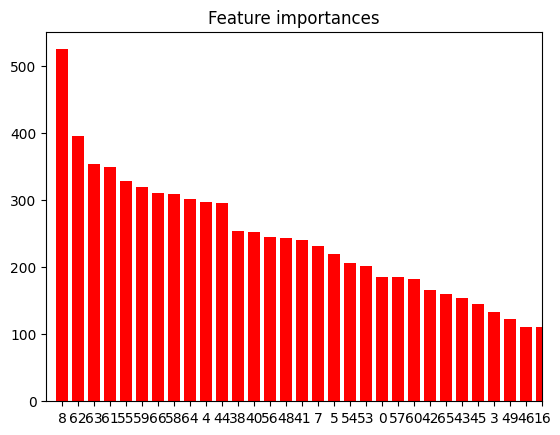

Selected features: [ 8 62 63 61 55 59 66 58 64  4 44 38 40 56 48 41  7  5 54 53  0 57 60 42
 65 43 45  3 49 46 16 52 39 12 51 17 26 47  2 30 28 11 50  9 14 27 20 19
  1 15 13 31 10  6 18 23 67 21 22 24 25 29 32 34 35 36 37 33]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

def lgb_feature_selection((X_train, y_train)):
    # Initialize LightGBM Classifier
    lgb_classifier = lgb.LGBMClassifier()
    
    # Fit the model
    lgb_classifier.fit((X_train, y_train))
    
    # Get feature importances
    feature_importances = lgb_classifier.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    
    # Zoom in on the first 10 features
    plt.xlim(-1, 30)  # Adjust the limit as needed
    
    plt.show()
    
    # Return indices of selected features based on importance
    return indices

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Load dataset as an example
X = df_new.values  # Replace df_new with your actual feature DataFrame
y = df_tbi1['d_kl_tl'].values  # Replace df_tbi1['d_kl_tl'] with your actual target variable

# Apply LightGBM feature selection
selected_features = lgb_feature_selection((X_train, y_train))

# Print the selected features
print("Selected features:", selected_features)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 58
[LightGBM] [Info] Start training from score -2.551046
[LightGBM] [Info] Start training from score -0.642454
[LightGBM] [Info] Start training from score -1.177655
[LightGBM] [Info] Start training from score -2.430418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

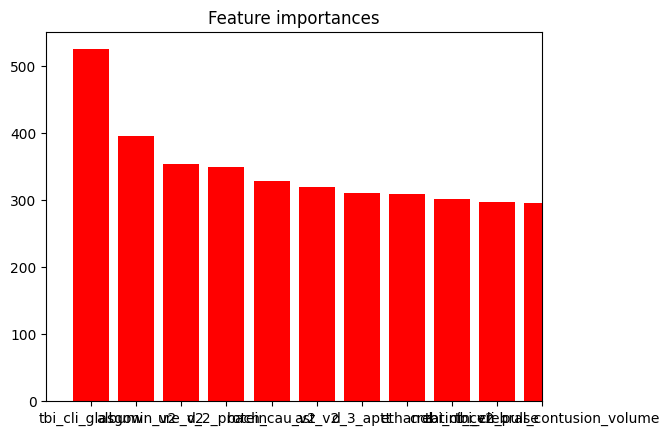

Selected features:
tbi_cli_glasgow
albumin_v2
ure_v2
d_2_protein
bach_cau_v2
ast_v2
d_3_aptt
ethanol
creatinin_v2
tbi_cli_pulse
tbi_ct_cerebral_contusion_volume
tbi_ct_epidural_hematoma_volume
tbi_ct_epidural_hematoma_value
tieu_cau_v2
tbi_ct_subarachnoid_characteristic
tbi_ct_subdural_hematoma_thick
tbi_cli_breathing_rate
tbi_cli_temp
hong_cau_v2
tbi_ct_rotterdam
age_at_record
d_1_hst
alt_v2
tbi_ct_subdural_hematoma_position_proprotion
prothrombin_v2
tbi_ct_subdural_hematoma_position_value
tbi_ct_blood_hematoma_volume
tbi_cli_time_acci_hos
tbi_ct_midline_shift_width
tbi_ct_blood_hematoma_proportion
tbi_cli_dam_chest_abdomen
tbi_ct_skull_risk
tbi_ct_epidural_hematoma_proportion
tbi_cli_para_ner
tbi_ct_skull_fracture_characteristic
tbi_cli_recall
tbi_ct_brain_parenchyma___1
tbi_ct_blood_hematoma_value
tbi_cli_reason
tbi_ct_brain_parenchyma___5
tbi_ct_brain_parenchyma___3
tbi_cli_blue
tbi_ct_bottom_tank_characteristic
tbi_cli_awaken
tbi_cli_epileptic
tbi_ct_brain_parenchyma___2
tbi_cli_p

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

def lgb_feature_selection(X, feature_names, y):
    # Initialize LightGBM Classifier
    lgb_classifier = lgb.LGBMClassifier()
    
    # Fit the model
    lgb_classifier.fit((X_train, y_train))
    
    # Get feature importances
    feature_importances = lgb_classifier.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. Feature '%s' (%f)" % (f + 1, feature_names[indices[f]], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
    
    # Zoom in on the first 10 features
    plt.xlim(-1, 10)  # Adjust the limit as needed
    
    plt.show()
    
    # Return indices of selected features based on importance
    return indices

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Load dataset as an example
X = df_new.values  # Replace df_new with your actual feature DataFrame
feature_names = df_new.columns.tolist()  # Assuming feature names are column names of df_new
y = df_tbi1['d_kl_tl'].values  # Replace df_tbi1['d_kl_tl'] with your actual target variable

# Apply LightGBM feature selection
selected_features = lgb_feature_selection(X, feature_names, y)

# Print the selected features
print("Selected features:")
for feature_idx in selected_features:
    print(feature_names[feature_idx])


## Feature selection

In [44]:

selected_columns = ["tbi_cli_glasgow", "ethanol", "tbi_cli_breathing_rate", "tbi_ct_subdural_hematoma_position_proprotion", "tbi_ct_subdural_hematoma_position_value",
"tbi_ct_rotterdam", "tbi_ct_epidural_hematoma_value", "tbi_ct_subdural_hematoma_thick", "tbi_ct_cerebral_contusion_volume",
"age_at_record","tbi_cli_time_acci_hos", "tbi_ct_skull_risk", "tbi_ct_epidural_hematoma_volume", "tbi_cli_pulse",
"tbi_ct_skull_fracture_characteristic","tbi_ct_subarachnoid_characteristic","tbi_cli_hypertension","tbi_cli_temp"]  # Replace with the names of the columns you want to select
# Select the columns
df_final = df_tbi[selected_columns]
df_final.head()


,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,13,237.9,19.0,1.0,70.0,2.0,NaN,7.0,NaN,52.0,2.0,2.0,NaN,70.0,NaN,NaN,2.0,36.5
1,13,0.0,22.0,1.0,35.0,NaN,NaN,23.0,NaN,75.0,NaN,2.0,NaN,77.0,NaN,NaN,2.0,36.8
2,15,NaN,18.0,NaN,NaN,2.0,NaN,NaN,2.0,37.0,NaN,2.0,NaN,67.0,2.0,NaN,2.0,36.6
3,14,NaN,19.0,2.0,60.0,2.0,NaN,6.0,NaN,66.0,NaN,2.0,NaN,75.0,2.0,NaN,2.0,36.5
4,15,0.0,18.0,NaN,NaN,1.0,NaN,NaN,NaN,20.0,4.0,2.0,NaN,85.0,2.0,NaN,2.0,36.8


In [45]:
df_sc = df_final
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [46]:
df_tbi_f.columns = df_final.columns.to_list()
df_tbi_f

,tbi_cli_glasgow,ethanol,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_subdural_hematoma_thick,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_time_acci_hos,tbi_ct_skull_risk,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_ct_skull_fracture_characteristic,tbi_ct_subarachnoid_characteristic,tbi_cli_hypertension,tbi_cli_temp
0,-0.018599,1.855910,0.328322,-0.625543,0.543214,0.227946,NaN,-0.153532,NaN,0.402031,-0.194118,0.663325,NaN,-0.792786,NaN,NaN,0.200895,-0.795610
1,-0.018599,-0.725666,2.066500,-0.625543,-3.308037,NaN,NaN,2.097267,NaN,1.489632,NaN,0.663325,NaN,-0.134370,NaN,NaN,0.200895,0.442006
2,0.672219,NaN,-0.251070,NaN,NaN,0.227946,NaN,NaN,-0.505425,-0.307274,NaN,0.663325,NaN,-1.074964,0.582223,NaN,0.200895,-0.383072
3,0.326810,NaN,0.328322,1.598611,-0.557143,0.227946,NaN,-0.294207,NaN,1.064049,NaN,0.663325,NaN,-0.322489,0.582223,NaN,0.200895,-0.795610
4,0.672219,-0.725666,-0.251070,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.111153,-0.182502,0.663325,NaN,0.618104,0.582223,NaN,0.200895,0.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,-1.020803,NaN,NaN,NaN,-1.016579,-0.194118,0.663325,NaN,NaN,0.582223,NaN,0.200895,NaN
256,-1.745643,1.059191,NaN,NaN,NaN,0.227946,NaN,NaN,NaN,-0.165413,-0.194118,-1.507557,NaN,NaN,0.582223,0.688247,0.200895,NaN
257,-0.018599,NaN,NaN,-0.625543,-1.657501,-1.020803,NaN,-0.575557,NaN,1.915215,8.157150,0.663325,NaN,NaN,NaN,NaN,0.200895,NaN
258,0.326810,NaN,NaN,1.598611,0.543214,0.227946,NaN,-0.997582,NaN,0.023735,-0.176695,0.663325,NaN,NaN,0.582223,-1.452966,0.200895,NaN


In [47]:
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi_i = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    float64
 1   ethanol                                       260 non-null    float64
 2   tbi_cli_breathing_rate                        260 non-null    float64
 3   tbi_ct_subdural_hematoma_position_proprotion  260 non-null    float64
 4   tbi_ct_subdural_hematoma_position_value       260 non-null    float64
 5   tbi_ct_rotterdam                              260 non-null    float64
 6   tbi_ct_epidural_hematoma_value                260 non-null    float64
 7   tbi_ct_subdural_hematoma_thick                260 non-null    float64
 8   tbi_ct_cerebral_contusion_volume              260 non-null    float64
 9   age_at_record                                 260 non-null    flo

## Spliting set

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, neighbors, svm
from sklearn.tree import DecisionTreeClassifier

In [49]:
X= df_tbi_i
y = df_new_tbi_target

In [51]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## LoG

#### LOOCV

In [60]:
# Create a model (Logistic Regression as an example)
model = svm.SVC(kernel='linear', C=1.0)

# Perform Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
scores = cross_val_score(model, (X_train, y_train), cv=loocv)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Mean Accuracy: 0.65
Standard Deviation: 0.4769696007084729


#### 10-fold CV

In [67]:
# Define the number of folds (k = 10)model = svm.SVC(kernel='linear', C=1.0)
model = svm.SVC(kernel='linear', C=1.0)
k_fold = KFold(n_splits=10, shuffle=True)

# Perform 10-fold cross-validation
cross_val_results = cross_val_score(model, (X_train, y_train), cv=k_fold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())

Cross-validation results: [0.80769231 0.76923077 0.76923077 0.69230769 0.76923077 0.65384615
 0.53846154 0.46153846 0.65384615 0.61538462]
Mean accuracy: 0.6730769230769231


## SVM

In [63]:
# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


#### LOOCV

In [65]:
# Create a model (Logistic Regression as an example)
model_svm = svm.SVC()

# Perform Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
scores = cross_val_score(model_svm, (X_train, y_train), cv=loocv)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Mean Accuracy: 0.6653846153846154
Standard Deviation: 0.4718558349687782


#### 10-fold CV

In [ ]:
# Define the number of folds (k = 10)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
cross_val_results = cross_val_score(model_svm, X_selected, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())

## DT

#### LOOCV

In [ ]:
# Create a model (Logistic Regression as an example)
dt_classifier = DecisionTreeClassifier()

# Perform Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
scores = cross_val_score(dt_classifier, (X_train, y_train), cv=loocv)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


#### 10-fold CV

In [ ]:
# Define the number of folds (k = 10)
k_fold = KFold(n_splits=10, shuffle=True)

# Perform 10-fold cross-validation
cross_val_results = cross_val_score(dt_classifier, X_selected, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())